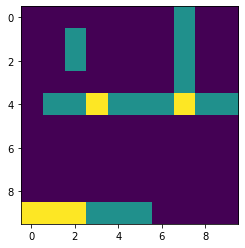

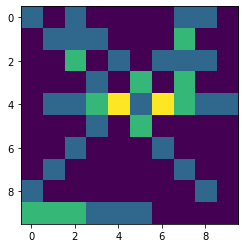

test 5 12


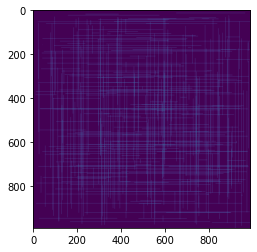

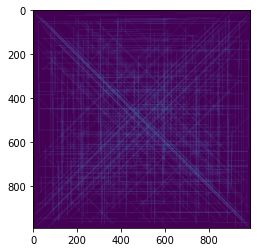

real 7142 20012


In [4]:
from typing import Tuple
from collections import defaultdict
import matplotlib.pyplot as plt

Coordinate = Tuple[int, int]

def get_intersecting(cords: list[tuple[Coordinate, Coordinate]], allow_diagonal: bool):
    grid: dict[Coordinate, int] = defaultdict(int)

    for cord in cords:
        p1, p2 = cord[0], cord[1]
        cx, cy = p1[0], p1[1]

        x_step = 1 if p2[0] > p1[0] else 0 if p2[0] == p1[0] else -1
        y_step = 1 if p2[1] > p1[1] else 0 if p2[1] == p1[1] else -1

        if not (allow_diagonal == False and x_step != 0 and y_step != 0):
            moving = True
            while moving:
                grid[(cx, cy)] += 1
                if cx == p2[0] and cy == p2[1]:
                    moving = False
                cx += x_step
                cy += y_step

    # plot_grid(grid)

    return len([c for c in grid.values() if c > 1])

def plot_grid(grid: dict[Coordinate, int]):
    x_size, y_size = 0, 0

    for coordinate in grid:
        x_size = coordinate[0] if coordinate[0] > x_size else x_size
        y_size = coordinate[1] if coordinate[1] > y_size else y_size

    data = [[0 for x in range(x_size + 1)] for y in range(y_size + 1)] 

    for coordinate in grid:
        data[coordinate[1]][coordinate[0]] = grid.get(coordinate)

    plt.imshow(data)
    plt.show()

def str_to_cord(str) -> Coordinate:
    return [int(i) for i in str.split(',')]

def main(file, type):
    data: list[str] = file.readlines()

    formatted_data: list[tuple[Coordinate, Coordinate]] = []

    for line in data:
        split_line = line.split()
        formatted_data.append((str_to_cord(split_line[0]), str_to_cord(split_line[2])))
        
    print(type, get_intersecting(formatted_data, False), get_intersecting(formatted_data, True))    

    

with open("test.txt") as input_file:
    main(input_file, "test")

with open("input.txt") as input_file:
    main(input_file, "real")

    
